In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import  skew

In [ ]:
data=pd.read_csv('abalone.csv')


In [ ]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
data.shape

(4177, 9)

In [ ]:
data['Age']=data['Rings']+1.5
data=data.drop('Rings',axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [ ]:
data.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Data Analysis and Visualization Univariate Analysis

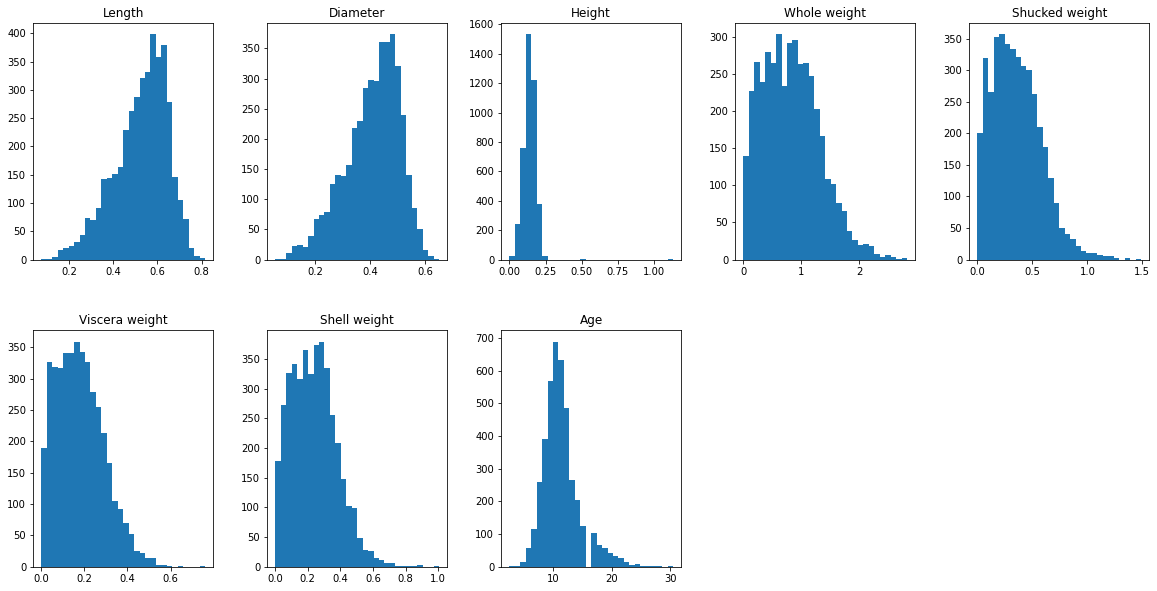

In [ ]:
data.hist(figsize=(20,10), grid=False, layout=(2,5), bins=30)
plt.show()

In [ ]:
Numerical = data.select_dtypes(include=[np.number]).columns
Categorical = data.select_dtypes(include=[np.object]).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
skew_values = skew(data[Numerical], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(Numerical), columns=['Features']), 
pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)


,Features,Skewness degree
2,Height,3.127694
7,Age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


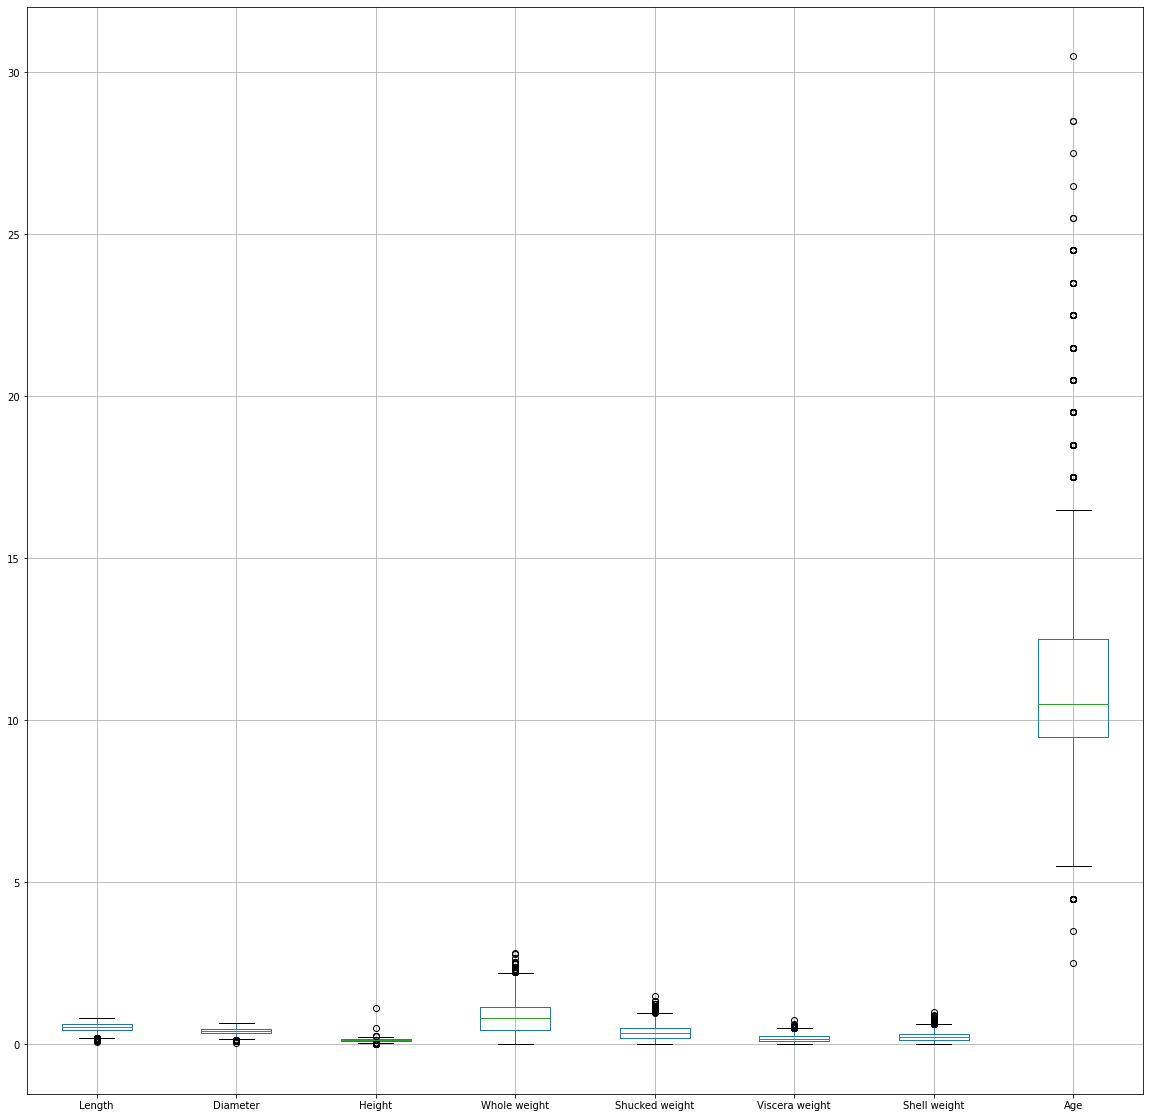

In [ ]:
data.boxplot(figsize=(20,20))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


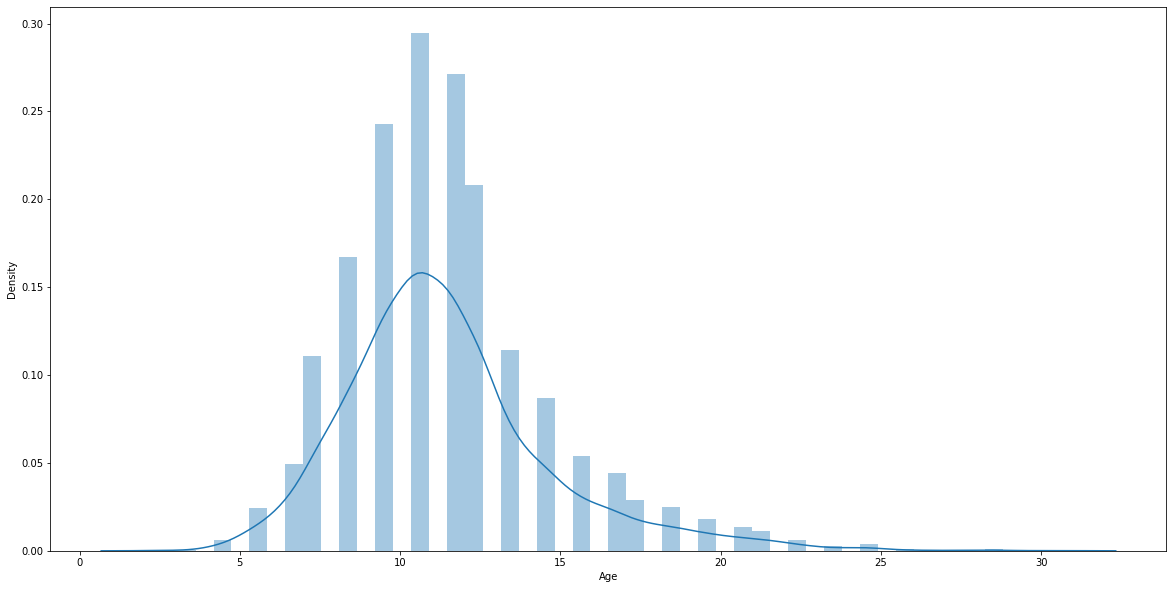

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(data['Age'])
plt.show()

Bivarite Analysis

In [ ]:
data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


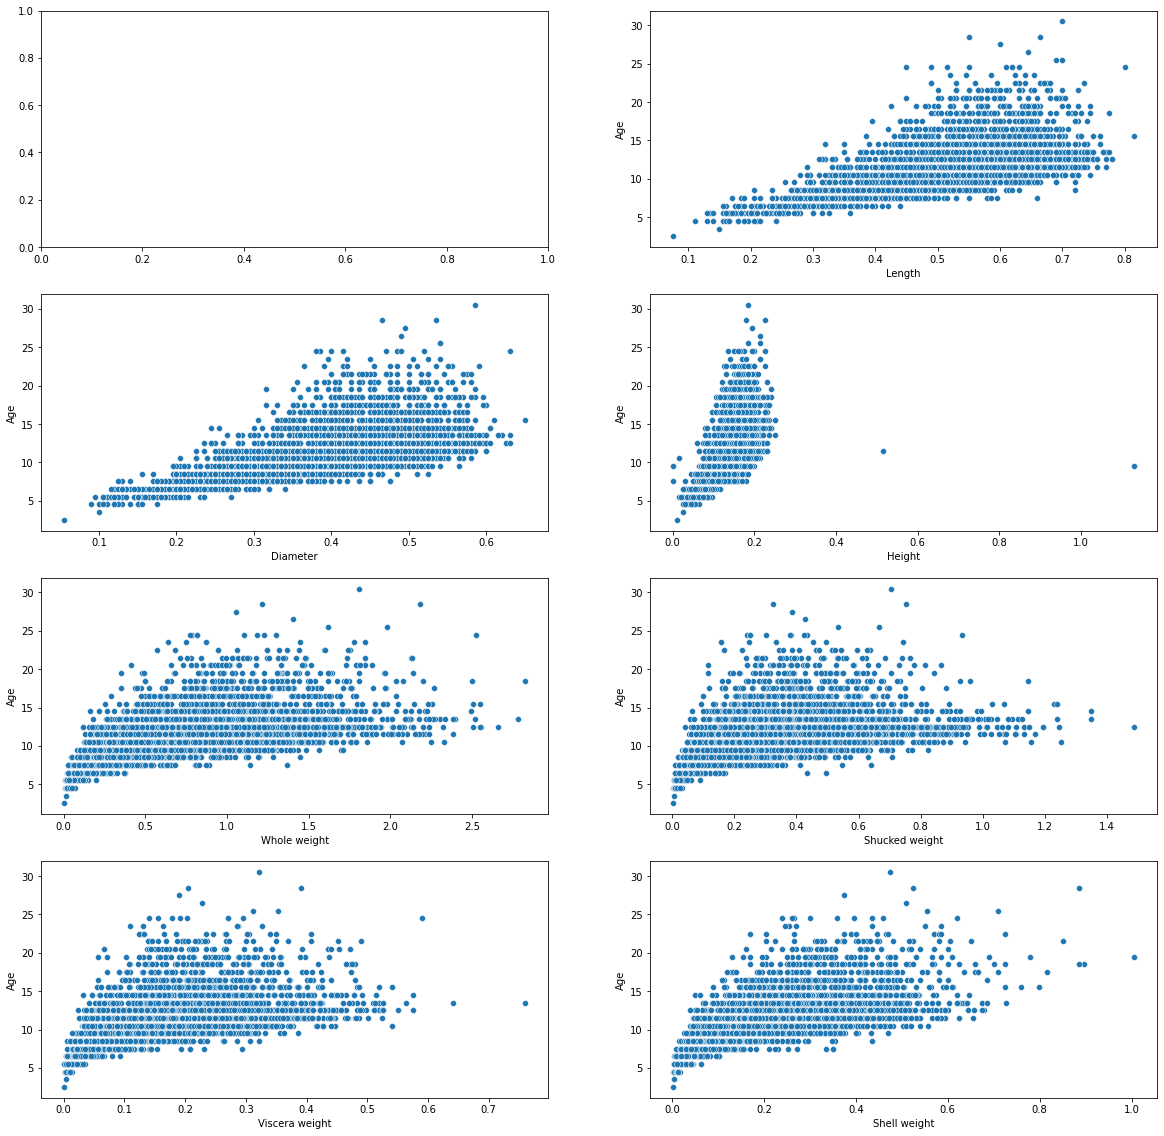

In [ ]:
fig,axes=plt.subplots(4,2, figsize=(20,20))
axes=axes.flatten()
for i  in range(1,len(data.columns)-1):
    sns.scatterplot(x=data.iloc[:,i],y=data['Age'],ax=axes[i])
plt.show()

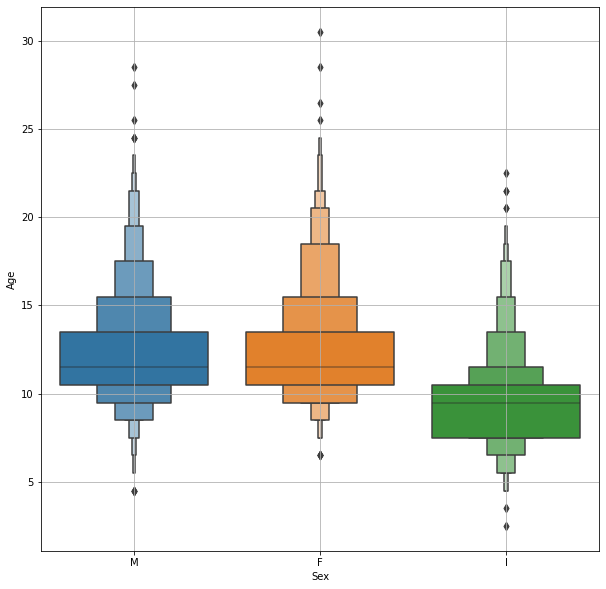

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,12.629304,3.104256,6.5,10.5,11.5,13.5,30.5
I,1342.0,9.390462,2.511554,2.5,7.5,9.5,10.5,22.5
M,1528.0,12.205497,3.026349,4.5,10.5,11.5,13.5,28.5


In [ ]:
plt.figure(figsize=(10,10))
sns.boxenplot(y=data['Age'], x=data['Sex'])
plt.grid()
plt.show()
data.groupby('Sex')['Age'].describe()

Multivariate Analysis

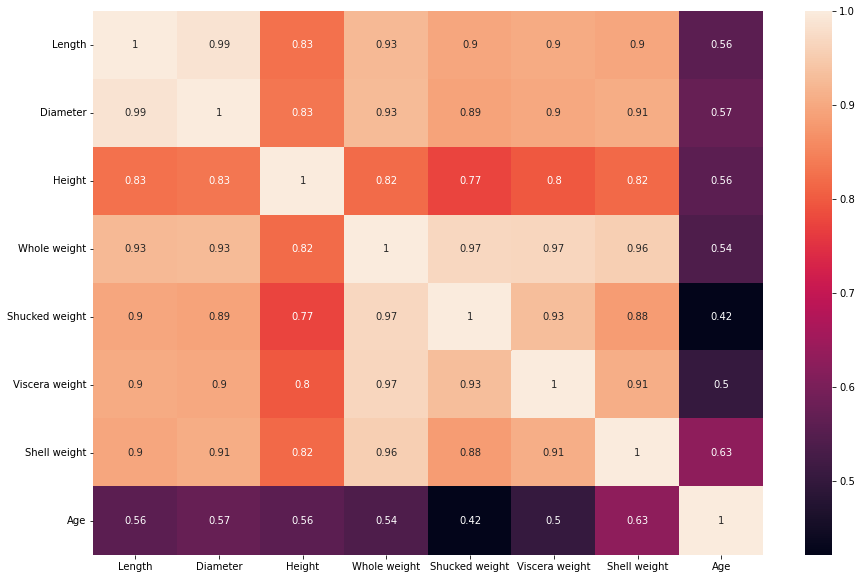

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

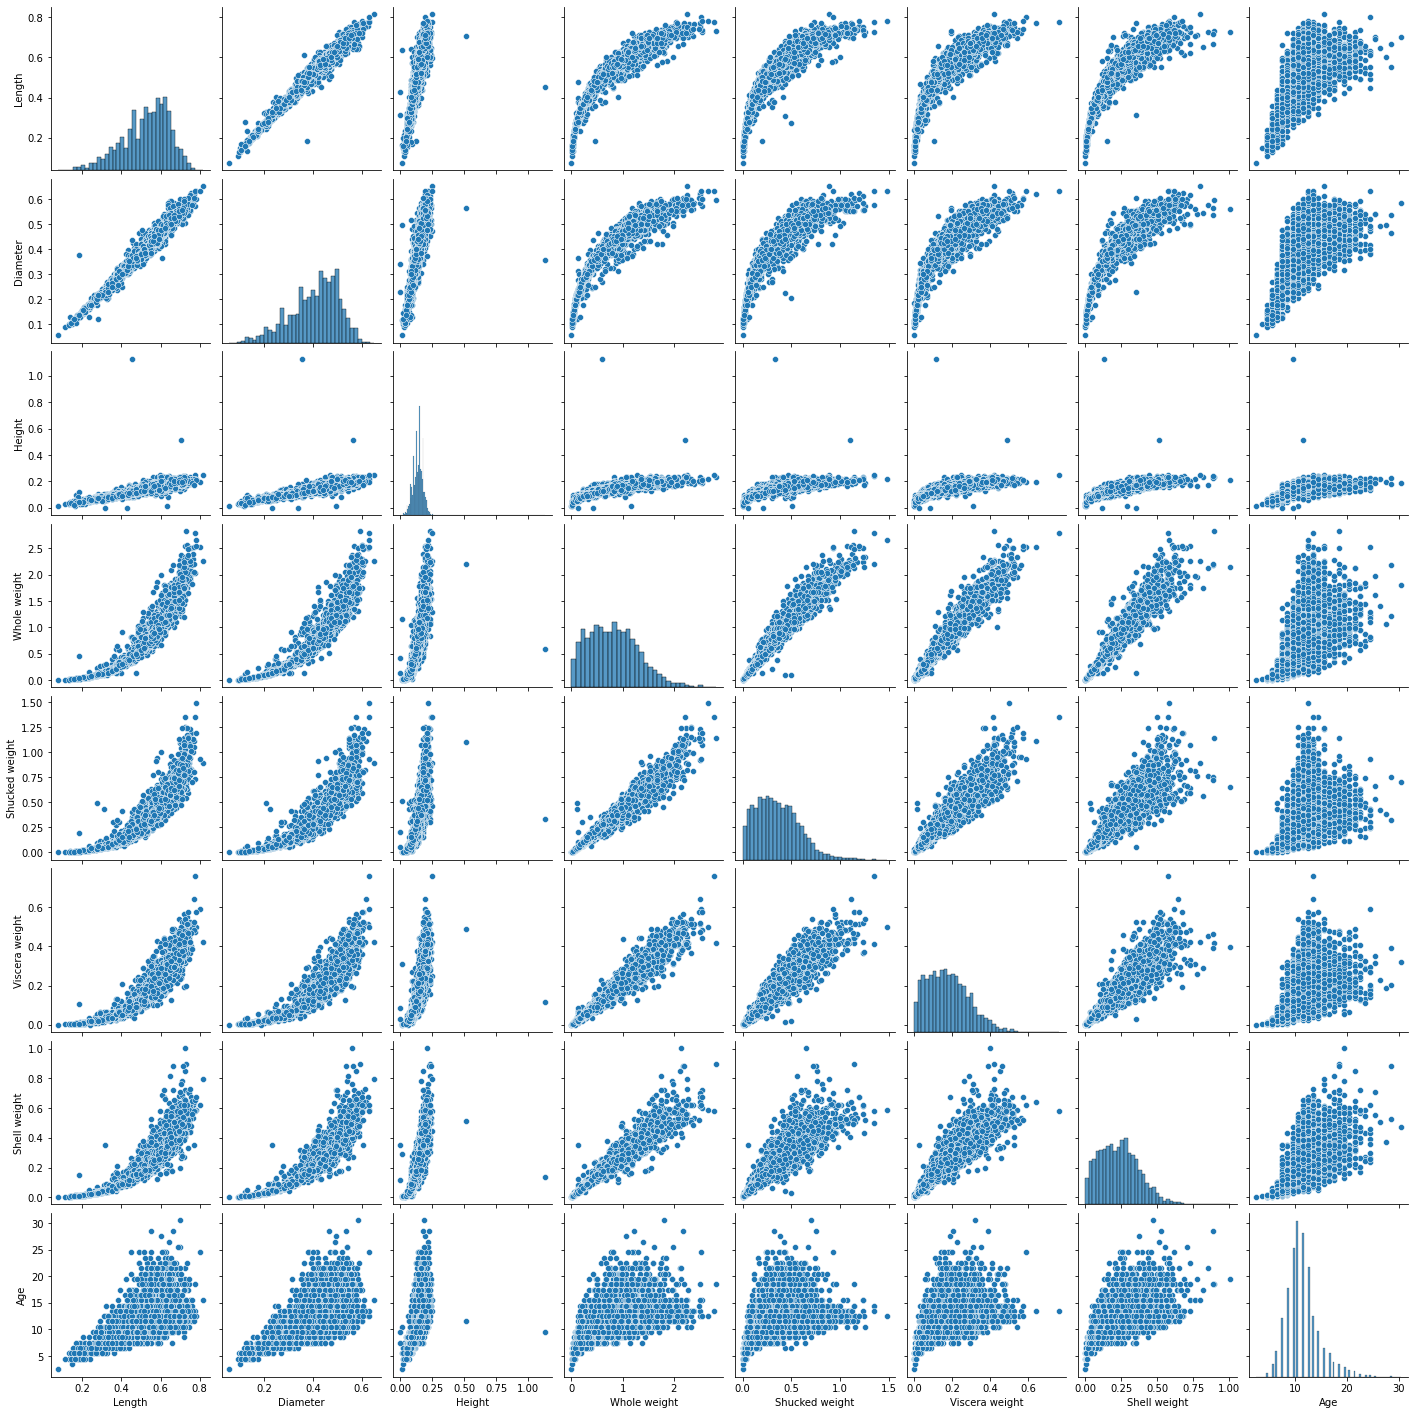

In [ ]:
sns.pairplot(data)
plt.show()

Descriptive statistics on dataset

In [ ]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.523992
Diameter           0.407881
Height             0.139516
Whole weight       0.828742
Shucked weight     0.359367
Viscera weight     0.180594
Shell weight       0.238831
Age               11.433684
dtype: float64

In [ ]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.523992
Diameter           0.407881
Height             0.139516
Whole weight       0.828742
Shucked weight     0.359367
Viscera weight     0.180594
Shell weight       0.238831
Age               11.433684
dtype: float64

In [ ]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Age               10.5000
dtype: float64

missing values and dealing them



In [ ]:
data.isna()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
dtype: bool

In [ ]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


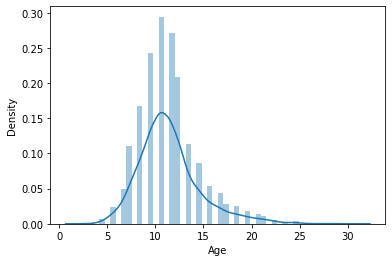

In [ ]:
print(sns.distplot(data['Age']))

In [ ]:
data.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole weight      -0.023644
Shucked weight     0.595124
Viscera weight     0.084012
Shell weight       0.531926
Age                2.330687
dtype: float64

In [ ]:
data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Age               10.395266
dtype: float64

In [ ]:
data.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
Age               3.224169
dtype: float64

finding and replacing the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


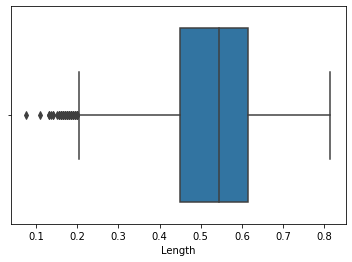

In [ ]:
sns.boxplot(data['Length'])


In [ ]:
qnt=data.quantile(q=(0.30,0.45))
qnt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0.30,0.470,0.365,0.120,0.5083,0.2140,0.108,0.15,9.5
0.45,0.525,0.410,0.135,0.7241,0.3035,0.156,0.21,10.5


In [ ]:
iqr=qnt.loc[0.45]-qnt.loc[0.30]
iqr

Length            0.0550
Diameter          0.0450
Height            0.0150
Whole weight      0.2158
Shucked weight    0.0895
Viscera weight    0.0480
Shell weight      0.0600
Age               1.0000
dtype: float64

In [ ]:
lower=qnt.loc[0.30]-1.5*iqr
lower

Length            0.38750
Diameter          0.29750
Height            0.09750
Whole weight      0.18460
Shucked weight    0.07975
Viscera weight    0.03600
Shell weight      0.06000
Age               8.00000
dtype: float64

In [ ]:
upper=qnt.loc[0.45]+1.5*iqr
upper

Length             0.60750
Diameter           0.47750
Height             0.15750
Whole weight       1.04780
Shucked weight     0.43775
Viscera weight     0.22800
Shell weight       0.30000
Age               12.00000
dtype: float64

In [ ]:
data['Length']=np.where(data['Length']>45,31,data['Length'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


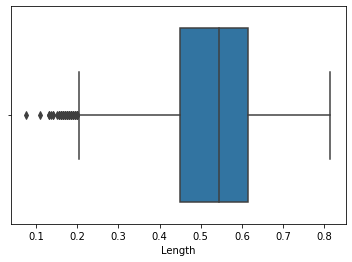

In [ ]:
sns.boxplot(data['Length'])


checking for categorical columns and perform encoding



In [ ]:
data['Sex'].replace( {'F':1,'M':0},inplace=True)

data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Splitting the data into dependent and independent variables



In [ ]:
y=data['Height']
y.head()

0    0.095
1    0.090
2    0.135
3    0.125
4    0.080
Name: Height, dtype: float64

In [ ]:
#independent

x=data.drop(columns=['Height'],axis=1)

x.head()

,Sex,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.2050,0.0895,0.0395,0.055,8.5


In [ ]:
data=pd.get_dummies(data,columns=['Height'])

data.head()

,Sex,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Height_0.0,Height_0.01,...,Height_0.21,Height_0.215,Height_0.22,Height_0.225,Height_0.23,Height_0.235,Height_0.24,Height_0.25,Height_0.515,Height_1.13
0,0,0.455,0.365,0.5140,0.2245,0.1010,0.150,16.5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.350,0.265,0.2255,0.0995,0.0485,0.070,8.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.530,0.420,0.6770,0.2565,0.1415,0.210,10.5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.440,0.365,0.5160,0.2155,0.1140,0.155,11.5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,I,0.330,0.255,0.2050,0.0895,0.0395,0.055,8.5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#encoding 
data = pd.get_dummies(data, drop_first=True)
data.head()

,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Height_0.0,Height_0.01,Height_0.015,...,Height_0.22,Height_0.225,Height_0.23,Height_0.235,Height_0.24,Height_0.25,Height_0.515,Height_1.13,Sex_1,Sex_I
0,0.455,0.365,0.5140,0.2245,0.1010,0.150,16.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.350,0.265,0.2255,0.0995,0.0485,0.070,8.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.530,0.420,0.6770,0.2565,0.1415,0.210,10.5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.440,0.365,0.5160,0.2155,0.1140,0.155,11.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.330,0.255,0.2050,0.0895,0.0395,0.055,8.5,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


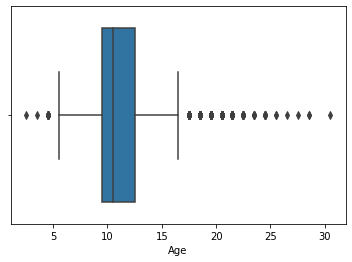

In [ ]:
sns.boxplot(data.Age)

In [ ]:
out = data.quantile(q = (0.25,0.75))
out

,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Height_0.0,Height_0.01,Height_0.015,...,Height_0.22,Height_0.225,Height_0.23,Height_0.235,Height_0.24,Height_0.25,Height_0.515,Height_1.13,Sex_1,Sex_I
0.25,0.450,0.35,0.4415,0.186,0.0935,0.130,9.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.615,0.48,1.1530,0.502,0.2530,0.329,12.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


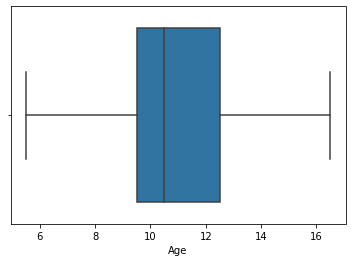

In [ ]:
r1 = data.Age.quantile(0.25)
r2 = data.Age.quantile(0.75)

iq = r2-r1

up_limit = r2 + 1.5*iq
low_limit = r1 - 1.5*iq

data['Age'] = np.where(data['Age']<low_limit,7,data['Age'])
sns.boxplot(x=data.Age,showfliers=False)